In [1]:
import requests
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
url  = "https://localbodydata.com/municipal-corporations-ujjain-250851"
page = requests.get(url)
#a URL that returns a 200 HTTP status code will have “OK” listed as its status.
#That's because a 200 HTTP status code indicates that the page is live.
#Ideally, you want this code because it says that users and web crawlers can access the page.
if page.status_code == 200:
    print('Downloaded page successfully')
else:
    print('Unable to download. Error code: {}'.format(page.status_code))


Downloaded page successfully


In [3]:
import lxml
df_html = pd.read_html(url, header=0, na_values=["Not assigned"])[1]
df_html

,#,Ward Name,Ward No,LGD Code
0,1,Bhairugarh ward,1,7339
1,2,Garhkalika,2,7340
2,3,Mangalnath,3,7341
3,4,Gayatri nagar,4,7342
4,5,Indira Gandhi Ward,5,7343
5,6,Gandhi Nagar ward,6,7344
6,7,Ankpaat,7,7345
7,8,Avantika,8,7346
8,9,Chausanth yogini,9,7347
9,10,Tilkeshwar,10,7348


In [4]:
df_html.to_csv("My Scraped data of Ujjain.csv")
area = pd.read_csv("My Scraped data of Ujjain.csv")

In [5]:
area.columns

Index(['Unnamed: 0', '#', 'Ward Name', 'Ward No', 'LGD Code'], dtype='object')

In [6]:
area.drop(["Unnamed: 0","#","Ward No","LGD Code"],axis=1,inplace=True)

In [7]:
area.columns

Index(['Ward Name'], dtype='object')

In [8]:
print(area[area["Ward Name"].str.contains("ward")])
print(area[area["Ward Name"].str.contains("Ward")])

            Ward Name
0     Bhairugarh ward
5   Gandhi Nagar ward
27       Subhash ward
28       Pushkar ward
                   Ward Name
4         Indira Gandhi Ward
54  Lalpur (OG) - Ward No.55


In [9]:
area["Area"]=area["Ward Name"].str.split(" w").str.get(0)
area["Area"]=area["Area"].str.split(" W").str.get(0)

In [10]:
print(area["Area"][54])
area.loc[54,"Area"] = "Lalpur"
area.drop(["Ward Name"], axis=1, inplace=True)
area.to_csv("My Cleaned data of Ujjain.csv")

Lalpur (OG) -


In [11]:
cityArea = pd.read_csv("My Cleaned data of Ujjain.csv")
cityArea.shape

(55, 2)

In [12]:
df = pd.DataFrame(cityArea)
df.insert(2,"Block",["Ujjain" for i in range(55)])
df.insert(3,"State",["Madhya Pradesh" for i in range(55)])
df.columns

Index(['Unnamed: 0', 'Area', 'Block', 'State'], dtype='object')

In [13]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.loc[0,"Area"] = "Bhairavgarh Jail"
df.loc[5,"Area"] = "Mohan nagar"
df.loc[10,"Area"] = "Molana Ajad Colony,Jansapura"
df.loc[23,"Area"] = "Sirsagar"
df.loc[51,"Area"] = "Damdama Colony"

In [14]:
# df["Area of Ujjain"] = df["Area"]+ ","+ df["Block"]
# area_withState = df["Area of Ujjain"] + "," + df["State"]
df.to_csv("My complete data of Ujjain.csv")

In [15]:
#from geopy.geocoders import ArcGIS
#
# def getLatitudeLongitude(area):
#     coordinates = ArcGIS()
#     location = coordinates.geocode(area)
#     return location
#
#
# Latitude =[]
# Longitude =[]
# data = pd.read_csv("My complete data of Ujjain.csv")
# # block_feild =  data["Block"]
# # pincode_feild=data["Pincode"]
# for i in (area_withState):
#     if getLatitudeLongitude(i) != None:
#         loc = getLatitudeLongitude(i)
#         Latitude.append(loc.latitude)
#         Longitude.append(loc.longitude)
#
# data["Latitude"] = Latitude
# data["Longitude"] = Longitude
# data.drop(["Unnamed: 0"], axis =1, inplace= True)
# print(data.columns)
# data.to_csv("My Final Data of Ujjain.csv")

In [16]:
readData = pd.read_excel("ezGeocode data of Ujjain.xlsx")
readData.to_csv("ezGeocode data of Ujjain.csv")

lat_Ujjain = readData["Latitude"].mean()
lon_Ujjain = readData["Longitude"].mean()
print(f"The geographical coordinates of Ujjain:{lat_Ujjain}, {lon_Ujjain}")

The geographical coordinates of Ujjain:23.181227350909094, 75.7872608490909


In [17]:
place= readData["Address"].unique().tolist()

In [18]:
ujjainArea_Color = {}
for address in place:
    ujjainArea_Color[address] = "#%02X%02X%02X" % tuple(np.random.choice(range(256), size=3))


Ujjain_map = folium.Map(location=[lat_Ujjain, lon_Ujjain], zoom_start=12)

for lat, long, areaName in zip(readData["Latitude"],
                                    readData["Longitude"],
                                    readData["Address"]):
    label_text = areaName
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, long],
        radius = 5,
        popup = label,
        color = ujjainArea_Color[address],
        fill_color = ujjainArea_Color[address],
        fill_opacity = 0.7).add_to(Ujjain_map)
Ujjain_map.save("Ujjain area map.html")   
Ujjain_map    

In [ ]:
CLIENT_ID = 'Your_Client_Id'
CLIENT_SECRET = 'Your_Client_Secret'
VERSION = 'Your_Client_Version'
LIMIT = 100
radius = 800


def getNearbyVenues(names, latitudes, longitudes, radius=800):
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)

        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Neighborhood Latitude',
                             'Neighborhood Longitude',
                             'Venue',
                             'Venue Latitude',
                             'Venue Longitude',
                             'Venue Category']

    return (nearby_venues)

df_Ujjain = pd.read_csv("ezGeocode data of Ujjain.csv")
# area_withState = df_Ujjain["Area of Ujjain"] + "," + df_Ujjain["State"]
Ujjain_venue = getNearbyVenues(names=df_Ujjain["Address"],
                               latitudes=df_Ujjain["Latitude"],
                               longitudes=df_Ujjain["Longitude"])


Bhairavgarh Jail,Ujjain
Garhkalika,Ujjain
Mangalnath,Ujjain
Gayatri nagar,Ujjain
Indira Gandhi,Ujjain
Mohan nagar,Ujjain
Ankpaat,Ujjain
Avantika,Ujjain
Chausanth yogini,Ujjain
Tilkeshwar,Ujjain
Molana Ajad Colony,Jansapura,Ujjain
kalidas,Ujjain
Veer Durgadas,Ujjain
Sayyedna,Ujjain
Geeta colony,Ujjain
Govardhan sagar colony,Ujjain
Sandipani,Ujjain
Sudama,Ujjain
Singh bhawani,Ujjain
Brahspati,Ujjain
Gopal mandir,Ujjain
Ramanuj,Ujjain
Palika,Ujjain
Sirsagar,Ujjain
Chamunda mata,Ujjain
Maharani laxmibai,Ujjain
Dada bhai naroji,Ujjain
Subhash,Ujjain
Pushkar,Ujjain
Begambaag,Ujjain
Jame shakeb,Ujjain
Ahilya bai,Ujjain
Harsiddhi,Ujjain
Mahakal,Ujjain
Dr hariram choubey,Ujjain
Nil ganga,Ujjain
Prakash nagar,Ujjain
Jal sewa,Ujjain
Kishanpura,Ujjain
Shri synthetics,Ujjain
Chakor park,Ujjain
Bhaktnagar,Ujjain
Laxmi nagar,Ujjain
freeganj,Ujjain
Sant vidhya narayan,Ujjain
Shashtri nagar,Ujjain
Alakhdham,Ujjain
Nana kheda,Ujjain
Muni nagar,Ujjain
Rishi nagar,Ujjain
Pt din dayal,Ujjain
Damdama Colony

In [20]:
Ujjain_venue.shape

(170, 7)

In [21]:
print(Ujjain_venue.groupby('Neighborhood').count())

                                     Neighborhood Latitude  \
Neighborhood                                                 
Ahilya bai,Ujjain                                        6   
Alakhdham,Ujjain                                         2   
Avantika,Ujjain                                          7   
Begambaag,Ujjain                                         4   
Bhaktnagar,Ujjain                                        4   
Brahspati,Ujjain                                         3   
Chakor park,Ujjain                                       1   
Chamunda mata,Ujjain                                     5   
Dada bhai naroji,Ujjain                                  4   
Damdama Colony,Ujjain                                    1   
Dr hariram choubey,Ujjain                                4   
Engineering college,Ujjain                               2   
Gayatri nagar,Ujjain                                     1   
Geeta colony,Ujjain                                      2   
Gopal ma

In [55]:
Unique_venue=Ujjain_venue["Venue Category"].unique().tolist()
print(Unique_venue)

['Motorcycle Dealership', 'Shopping Mall', 'Pizzeria', 'Market', 'Tea Room', 'Coffee Shop', 'Hotel', 'Movie Theater', 'Comic Book Store', 'North Indian Restaurant', 'Hindu Temple', 'Furniture and Home Store', 'Museum', 'Restaurant', 'Indian Restaurant', 'Motel', 'Rail Station', 'Retail', 'Bus Station', 'History Museum', 'Asian Restaurant', "Men's Store", 'Fast Food Restaurant', 'Ice Cream Parlor', 'Food and Beverage Retail', 'Mattress Store', 'Park', 'Resort']


In [56]:
Unique_venue.remove("Hindu Temple")
Unique_venue.remove("Bus Station")
Unique_venue.remove("Rail Station")
Unique_venue.remove("Market")
Unique_venue.remove("Park")
Unique_venue

['Motorcycle Dealership',
 'Shopping Mall',
 'Pizzeria',
 'Tea Room',
 'Coffee Shop',
 'Hotel',
 'Movie Theater',
 'Comic Book Store',
 'North Indian Restaurant',
 'Furniture and Home Store',
 'Museum',
 'Restaurant',
 'Indian Restaurant',
 'Motel',
 'Retail',
 'History Museum',
 'Asian Restaurant',
 "Men's Store",
 'Fast Food Restaurant',
 'Ice Cream Parlor',
 'Food and Beverage Retail',
 'Mattress Store',
 'Resort']

In [57]:
print(Ujjain_venue.head())
Ujjain_venue.to_csv("My Ujjain Venues.csv")

           Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Gayatri nagar,Ujjain              23.199013               75.789108   
1  Indira Gandhi,Ujjain              23.176467               75.788516   
2  Indira Gandhi,Ujjain              23.176467               75.788516   
3  Indira Gandhi,Ujjain              23.176467               75.788516   
4  Indira Gandhi,Ujjain              23.176467               75.788516   

                                     Venue  Venue Latitude  Venue Longitude  \
0  Royal Enfield Showroom - Prakash Motors       23.198459        75.787386   
1                      Treasure Bazar Mall       23.175693        75.792767   
2                           Domino's Pizza       23.179000        75.785000   
3                                 Freegunj       23.176258        75.790337   
4                            Om Cafe House       23.170121        75.789060   

          Venue Category  
0  Motorcycle Dealership  
1          Shopping Mall  

In [58]:
def countVenues_category(data):
    dict ={key: len(data[data["Venue Category"]== key]) for key in data["Venue Category"]}
    return dict

data = pd.read_csv("My Ujjain Venues.csv")

venue_dict = countVenues_category(data)

#reverse with a value of True will arrange the sorted dictionary in descending order
sortVenue_dict = sorted(venue_dict.items(), key=lambda x:x[1],reverse=True)
convert_toDict = dict(sortVenue_dict)
print(convert_toDict)

{'Hotel': 45, 'Tea Room': 20, 'Shopping Mall': 18, 'Pizzeria': 18, 'Market': 17, 'Hindu Temple': 6, 'Comic Book Store': 4, 'Furniture and Home Store': 4, 'Museum': 4, 'Motorcycle Dealership': 3, 'Indian Restaurant': 3, 'Asian Restaurant': 3, 'Coffee Shop': 2, 'Movie Theater': 2, 'Restaurant': 2, 'Motel': 2, 'Rail Station': 2, 'Bus Station': 2, "Men's Store": 2, 'Fast Food Restaurant': 2, 'Ice Cream Parlor': 2, 'North Indian Restaurant': 1, 'Retail': 1, 'History Museum': 1, 'Food and Beverage Retail': 1, 'Mattress Store': 1, 'Park': 1, 'Resort': 1}


<module 'matplotlib.pyplot' from 'D:\\Coding\\anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

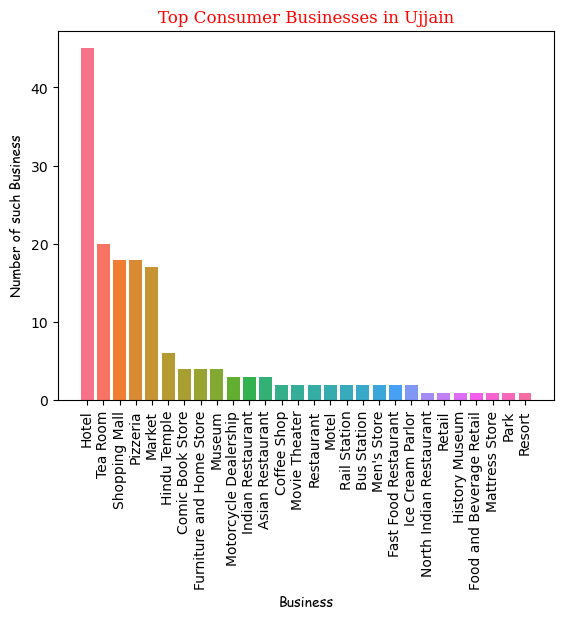

In [59]:
index=np.arange(len(convert_toDict))
palette = sns.color_palette("husl", len(convert_toDict))
Venue_name = list(convert_toDict.keys())
Venue_count = np.array(list(convert_toDict.values()))

plt.bar(index, Venue_count, color=palette)
plt.xticks(index,Venue_name, rotation=90)

font1={'family':'serif','color':'red'}
font2={'family':'cursive'}

plt.title("Top Consumer Businesses in Ujjain",fontdict=font1)
plt.xlabel("Business", fontdict=font2)
plt.ylabel("Number of such Business", fontdict=font2)
plt

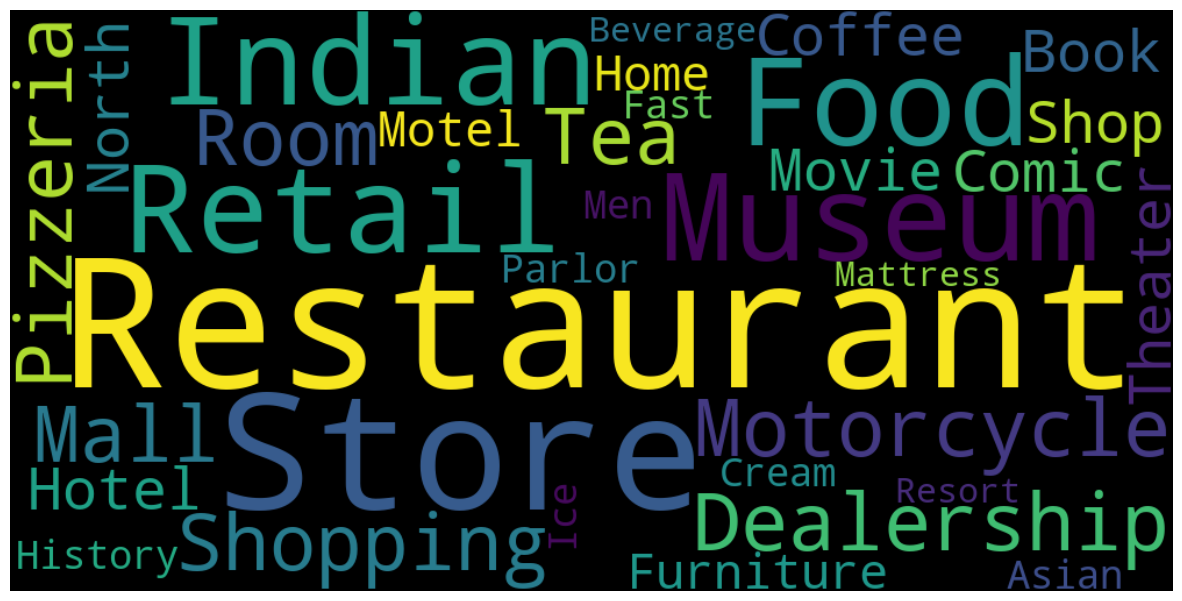

In [60]:
#convert list to string and generate
unique_string=(" ").join(Unique_venue)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("Wordcloud of Venue"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [61]:
"Hotel" in Ujjain_venue['Venue Category'].unique()

True

In [62]:
#pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables
to_onehot = pd.get_dummies(Ujjain_venue[['Venue Category']], prefix="", prefix_sep="", dtype='int')

to_onehot['Neighborhood'] = Ujjain_venue['Neighborhood'] 
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(170, 29)


,Neighborhood,Asian Restaurant,Bus Station,Coffee Shop,Comic Book Store,Fast Food Restaurant,Food and Beverage Retail,Furniture and Home Store,Hindu Temple,History Museum,...,Museum,North Indian Restaurant,Park,Pizzeria,Rail Station,Resort,Restaurant,Retail,Shopping Mall,Tea Room
0,"Gayatri nagar,Ujjain",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Indira Gandhi,Ujjain",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,"Indira Gandhi,Ujjain",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,"Indira Gandhi,Ujjain",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Indira Gandhi,Ujjain",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
to_grouped = to_onehot.groupby(["Neighborhood"]).mean().reset_index()

print(to_grouped.shape)
to_grouped.head()

(46, 29)


,Neighborhood,Asian Restaurant,Bus Station,Coffee Shop,Comic Book Store,Fast Food Restaurant,Food and Beverage Retail,Furniture and Home Store,Hindu Temple,History Museum,...,Museum,North Indian Restaurant,Park,Pizzeria,Rail Station,Resort,Restaurant,Retail,Shopping Mall,Tea Room
0,"Ahilya bai,Ujjain",0.0,0.0,0.000000,0.000000,0.0,0.00,0.166667,0.0,0.166667,...,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00
1,"Alakhdham,Ujjain",0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.50
2,"Avantika,Ujjain",0.0,0.0,0.142857,0.142857,0.0,0.00,0.000000,0.0,0.000000,...,0.0,0.142857,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00
3,"Begambaag,Ujjain",0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.25,0.25
4,"Bhaktnagar,Ujjain",0.0,0.0,0.000000,0.000000,0.0,0.25,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.25,0.00


In [64]:
to_grouped.to_csv("Venue Category with decimal variablr.csv")

In [65]:
len(to_grouped[to_grouped['Pizzeria'] > 0])

18

In [66]:
Pizzeria= to_grouped[["Neighborhood",'Pizzeria']]
Pizzeria.head()

,Neighborhood,Pizzeria
0,"Ahilya bai,Ujjain",0.00
1,"Alakhdham,Ujjain",0.00
2,"Avantika,Ujjain",0.00
3,"Begambaag,Ujjain",0.25
4,"Bhaktnagar,Ujjain",0.00


In [67]:
from sklearn.cluster import KMeans
toclusters = 3

to_clustering = Pizzeria.drop(["Neighborhood"],axis=1)

kmeans = KMeans(n_clusters=toclusters, random_state=1)
kmeans.fit_transform(to_clustering)

kmeans.labels_[0:20]

D:\Coding\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Coding\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2])

In [68]:
to_merged = Pizzeria.copy()
to_merged["Cluster Labels"] = kmeans.labels_

In [69]:
# to_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
to_merged.head(5)

,Neighborhood,Pizzeria,Cluster Labels
0,"Ahilya bai,Ujjain",0.00,1
1,"Alakhdham,Ujjain",0.00,1
2,"Avantika,Ujjain",0.00,1
3,"Begambaag,Ujjain",0.25,2
4,"Bhaktnagar,Ujjain",0.00,1


In [70]:
to_merged = to_merged.join(Ujjain_venue.set_index("Neighborhood"), on="Neighborhood")
print(to_merged.shape)
to_merged.head()

(170, 9)


,Neighborhood,Pizzeria,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Ahilya bai,Ujjain",0.0,1,23.18098,75.771921,New Ashirwad Guest House,23.181071,75.771753,Hotel
0,"Ahilya bai,Ujjain",0.0,1,23.18098,75.771921,Artize,23.178615,75.769126,Furniture and Home Store
0,"Ahilya bai,Ujjain",0.0,1,23.18098,75.771921,Hotel Atlas Palace,23.178628,75.769012,Hotel
0,"Ahilya bai,Ujjain",0.0,1,23.18098,75.771921,OYO 17161 Hotel Mahalaxmi,23.184378,75.770267,Hotel
0,"Ahilya bai,Ujjain",0.0,1,23.18098,75.771921,Vikaramditya Teela,23.183488,75.765674,History Museum


In [71]:
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged.head()

,Neighborhood,Pizzeria,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
32,"Pushkar,Ujjain",0.142857,0,23.176132,75.781444,Domino's Pizza,23.17900,75.785000,Pizzeria
7,"Chamunda mata,Ujjain",0.200000,0,23.183252,75.782510,Domino's Pizza,23.17900,75.785000,Pizzeria
32,"Pushkar,Ujjain",0.142857,0,23.176132,75.781444,Ujjain Railway Station,23.17962,75.780880,Rail Station
7,"Chamunda mata,Ujjain",0.200000,0,23.183252,75.782510,Ujjain Railway Station,23.17962,75.780880,Rail Station
7,"Chamunda mata,Ujjain",0.200000,0,23.183252,75.782510,Ajay Shoes,23.18142,75.781316,Retail


In [72]:
map_clusters = folium.Map(location=[lat_Ujjain, lon_Ujjain],zoom_start=14)

markers_colors={0 :'red',1 :'blue',2 :'green',3 :'yellow',4 :'cyan',5 :'black'}

for lat, lon, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Cluster Labels']):
    
    
    folium.features.CircleMarker(
        [lat, lon],
        radius=5,
       
        color =markers_colors[cluster],
        fill_color=markers_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [73]:
to_merged.loc[(to_merged['Cluster Labels'] ==0) & (to_merged['Venue Category'] == 'Pizzeria')]

,Neighborhood,Pizzeria,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
32,"Pushkar,Ujjain",0.142857,0,23.176132,75.781444,Domino's Pizza,23.179,75.785,Pizzeria
7,"Chamunda mata,Ujjain",0.200000,0,23.183252,75.782510,Domino's Pizza,23.179,75.785,Pizzeria
44,"freeganj,Ujjain",0.142857,0,23.178496,75.791651,Domino's Pizza,23.179,75.785,Pizzeria


In [74]:
to_merged.loc[(to_merged['Cluster Labels'] ==1) & (to_merged['Venue Category'] == 'Pizzeria') ]

,Neighborhood,Pizzeria,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [75]:
to_merged.loc[(to_merged['Cluster Labels'] ==2) & (to_merged['Venue Category'] == 'Pizzeria') ]

,Neighborhood,Pizzeria,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
36,"Sant vidhya narayan,Ujjain",0.25,2,23.176467,75.788516,Domino's Pizza,23.179,75.785,Pizzeria
37,"Sayyedna,Ujjain",0.25,2,23.176467,75.788516,Domino's Pizza,23.179,75.785,Pizzeria
39,"Singh bhawani,Ujjain",0.25,2,23.176467,75.788516,Domino's Pizza,23.179,75.785,Pizzeria
3,"Begambaag,Ujjain",0.25,2,23.176467,75.788516,Domino's Pizza,23.179,75.785,Pizzeria
8,"Dada bhai naroji,Ujjain",0.25,2,23.176467,75.788516,Domino's Pizza,23.179,75.785,Pizzeria
19,"Jame shakeb,Ujjain",0.25,2,23.176467,75.788516,Domino's Pizza,23.179,75.785,Pizzeria
25,"Molana Ajad Colony,Jansapura,Ujjain",0.25,2,23.176467,75.788516,Domino's Pizza,23.179,75.785,Pizzeria
23,"Maharani laxmibai,Ujjain",0.25,2,23.176467,75.788516,Domino's Pizza,23.179,75.785,Pizzeria
17,"Indira Gandhi,Ujjain",0.25,2,23.176467,75.788516,Domino's Pizza,23.179,75.785,Pizzeria
18,"Jal sewa,Ujjain",0.25,2,23.176467,75.788516,Domino's Pizza,23.179,75.785,Pizzeria


In [76]:
to_merged.loc[(to_merged['Cluster Labels'] ==1)]

,Neighborhood,Pizzeria,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
27,"Nana kheda,Ujjain",0.0,1,23.156521,75.790198,Café Coffee Day,23.156482,75.794489,Coffee Shop
27,"Nana kheda,Ujjain",0.0,1,23.156521,75.790198,Sleepwell,23.161147,75.787814,Mattress Store
27,"Nana kheda,Ujjain",0.0,1,23.156521,75.790198,Hotel Shipra Residency,23.157899,75.787198,Hotel
27,"Nana kheda,Ujjain",0.0,1,23.156521,75.790198,Pvr Cinemas,23.157271,75.787902,Movie Theater
26,"Muni nagar,Ujjain",0.0,1,23.165589,75.789835,Park,23.167444,75.797126,Park
...,...,...,...,...,...,...,...,...,...
0,"Ahilya bai,Ujjain",0.0,1,23.180980,75.771921,Vikaramditya Teela,23.183488,75.765674,History Museum
0,"Ahilya bai,Ujjain",0.0,1,23.180980,75.771921,OYO 17161 Hotel Mahalaxmi,23.184378,75.770267,Hotel
0,"Ahilya bai,Ujjain",0.0,1,23.180980,75.771921,Hotel Atlas Palace,23.178628,75.769012,Hotel
0,"Ahilya bai,Ujjain",0.0,1,23.180980,75.771921,Artize,23.178615,75.769126,Furniture and Home Store


In [77]:
import joblib

In [81]:
joblib.dump(Unique_venue,open('Business_name.joblib','wb'))

In [79]:
joblib.dump(Ujjain_venue,open("My Ujjain Venues.joblib",'wb'))

In [80]:
joblib.dump(to_grouped,open('Venue Category with decimal variablr','wb'))